# Problem Statement

### Business problem overview

1. In the telecom industry, customers have many options to choose from and can easily switch from one provider to another. This competitive market has led to an average annual churn rate of 15-25% for the telecommunications industry. Since it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become more important than customer acquisition.

2. For many incumbent operators, retaining high-profitable customers is the top business goal.

3. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyze customer-level data from a leading telecom firm to build predictive models to identify customers at high risk of churn and to identify the main indicators of churn.

# Objective
- To Predict the customers who are about to churn from a telecom operator
- We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
  Churn would be based on Usage

# Key Steps Undertaken
#### Loading Libs :
- Loading necessary libraries
 - Data Processing.
 - Visualization.
 - Model Building.
 - Warnings Handling.

#### Data view at a glance :
- Data loading.
- Data dictionary.


#### Feature Engineering :
- Aggregating data by row to form new columns.
- Splitting data at 80/20.

#### Treating Missing Values :
- Visalizing missing values.
- Replacing missing values with simple constant imputation.
   
#### Exploratory Data Analysis & Handling Outliers:
- Perform Univarite analysis.
- Treating outliers detected under Univariate Analysis.
- Perform Bi-variate Analysis and Discover correlations.
 
#### Deducing Feature Importance :
- Using RandomForest deduce feature importance.
- Dimensionality Reduction using PCA.
- Visualize elements in lower dimension.

#### Model Building & Evaluation :
- Picking Logistic Regression for model building.
- Creating Pipeline for step to model building.
- Building the model.
- Model Evaluation

## <font color= green> Notebook Walkthrough (Hyperlinked):
[Loading Libraries](#libs)
#### 1. [Data view at a glance.](#data_view)
#### 2. [Feature Engineering.](#feature_engg)
#### 3. [Treating Missing Values.](#miss_val)
#### 4. [Exploratory Data Analysis & Handling Outliers.](#eda)
#### 5. [Deducing Feature Importance.](#feature_imp)
#### 6. [Model Building & Evaluation.](#model_build)

# Loading Libraries <a id='libs'></a>

In [1]:
#Data Handling
import pandas as pd
import numpy as np
import re
import os

#Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Model Building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score


#Handling Warnings (commonly found in deprecated libs)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
data = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/train.csv")
unseen = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/test.csv")
sample = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/sample.csv")
data_dict = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


# 1. Data view at a glance <a id='data_view'></a>

In [6]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


The data dictionary contains a list of abbreviations that provides us with all the information we need to understand what a specific feature or variable in the churn dataset represents:

> ARPU -> Average revenue per user + KPI for the month of July
>
> OFFNET ->  All kind of calls outside the operator T network.
>
>ROAM -> Indicates that customer is in roaming zone during the call
>
>SPL -> Special calls

In [9]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   circle_id          69999 non-null  int64  
 1   total_rech_amt_6   69999 non-null  int64  
 2   total_rech_amt_7   69999 non-null  int64  
 3   total_rech_amt_8   69999 non-null  int64  
 4   total_og_mou_6     69999 non-null  float64
 5   total_og_mou_7     69999 non-null  float64
 6   total_og_mou_8     69999 non-null  float64
 7   offnet_mou_6       67231 non-null  float64
 8   offnet_mou_7       67312 non-null  float64
 9   offnet_mou_8       66296 non-null  float64
 10  arpu_3g_6          17568 non-null  float64
 11  arpu_3g_7          17865 non-null  float64
 12  arpu_3g_8          18417 non-null  float64
 13  arpu_2g_6          17568 non-null  float64
 14  arpu_2g_7          17865 non-null  float64
 15  arpu_2g_8          18417 non-null  float64
 16  vol_3g_mb_6        699

In [10]:
data.describe(include="all")

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
count,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,...,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,109.0,328.139788,322.376363,323.846355,306.451436,310.572674,304.513065,198.874771,197.153383,196.543577,...,85.846074,86.348404,122.171882,128.934444,135.486541,51.773924,51.240204,50.127506,1220.639709,0.101887
std,0.0,404.211068,411.070120,426.181405,465.502866,479.131770,477.936832,316.818355,322.482226,324.089234,...,178.067280,170.297094,554.869965,554.096072,568.310234,212.513909,211.114667,213.101403,952.426321,0.302502
min,109.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.090000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000
25%,109.0,110.000000,100.000000,90.000000,44.780000,42.910000,38.710000,34.860000,32.240000,31.575000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000
50%,109.0,229.000000,220.000000,225.000000,145.280000,141.230000,138.360000,96.480000,91.885000,91.800000,...,8.800000,9.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000
75%,109.0,438.000000,430.000000,436.000000,374.305000,380.045000,370.895000,232.990000,227.630000,229.345000,...,122.070000,122.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000
max,109.0,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,8362.360000,7043.980000,14007.340000,...,4809.360000,3483.170000,45735.400000,28144.120000,30036.060000,10285.900000,7873.550000,11117.610000,4337.000000,1.000000


# 2. Feature Engineering <a id='feature_engg'></a>

Aggregating data for each row with Sum, Averages

In [7]:
ids = ['id','circle_id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

data = data[variables].set_index('id')

In [8]:
data.head()

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,77,65,10,81.21,221.68,3.63,32.24,96.68,2.33,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,1958,0
1,109,0,145,50,0.00,30.73,31.66,0.00,25.99,30.89,...,122.08,NaN,0.0,3.96,0.0,0.0,352.91,0.00,710,0
2,109,70,120,0,56.49,99.36,0.00,53.99,82.05,0.00,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,882,0
3,109,160,240,130,76.03,95.98,53.84,68.76,78.48,50.23,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,982,0
4,109,290,136,122,63.26,42.94,15.76,56.99,38.11,9.63,...,35.12,0.0,0.0,0.00,0.0,390.8,308.89,213.47,647,0


### -------------------------------------------------------- Splitting Data--------------------------------------------------------

In [11]:
data['circle_id'].unique()

array([109])

In [12]:
X = data.drop(['circle_id'],1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 22), (69999,))

Splitting train and test data to avoid any contamination of the test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 22), (14000, 22), (55999,), (14000,))

In [14]:
X_train.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,arpu_3g_6,...,arpu_2g_6,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,,,,,,
32193,790,0,565,28.24,25.14,35.34,23.64,23.11,33.39,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,494
43655,330,270,260,305.38,281.21,233.74,300.08,279.19,225.86,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1223
3787,354,518,400,570.64,398.33,264.03,526.13,340.41,247.03,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,801
7118,538,264,298,237.03,102.64,91.53,223.61,98.59,79.19,40.06,...,0.0,0.00,0.0,1624.05,1231.11,721.21,12.78,9.85,13.62,955
38527,0,345,566,19.88,45.56,11.63,0.88,7.31,4.88,NaN,...,NaN,10.58,3.9,0.00,0.00,0.00,0.00,2365.29,2307.22,407


# 3. Treating Missing data <a id='missing_val'></a>

<AxesSubplot:ylabel='id'>

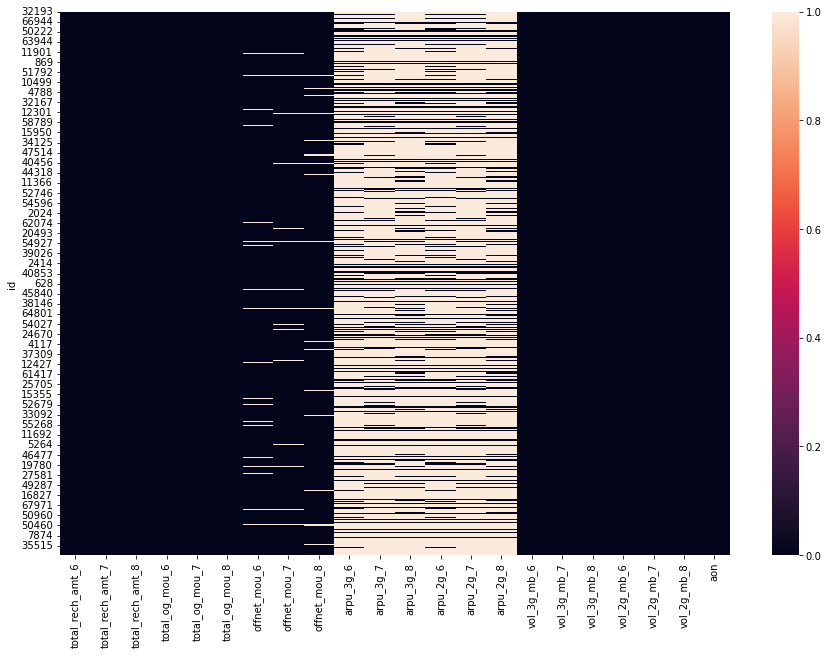

In [20]:
#Visualizing Missing data using Seaborn

plt.figure(figsize=(15,10))
sns.heatmap(X_train.isna())

In [22]:
#Missing value %
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent

total_rech_amt_6     0.000000
total_rech_amt_7     0.000000
total_rech_amt_8     0.000000
total_og_mou_6       0.000000
total_og_mou_7       0.000000
total_og_mou_8       0.000000
offnet_mou_6         3.994714
offnet_mou_7         3.789353
offnet_mou_8         5.296523
arpu_3g_6           75.020983
arpu_3g_7           74.620975
arpu_3g_8           73.760246
arpu_2g_6           75.020983
arpu_2g_7           74.620975
arpu_2g_8           73.760246
vol_3g_mb_6          0.000000
vol_3g_mb_7          0.000000
vol_3g_mb_8          0.000000
vol_2g_mb_6          0.000000
vol_2g_mb_7          0.000000
vol_2g_mb_8          0.000000
aon                  0.000000
dtype: float64

`Columns with too many missing values are not very useful for predicting churn, so we drop them and keep only the columns that have less than 40% missing data.`

In [23]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')

In [24]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55999, 16)

`We will perform a simple imputation with constant values as zeros.`

In [25]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

In [26]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

<AxesSubplot:ylabel='id'>

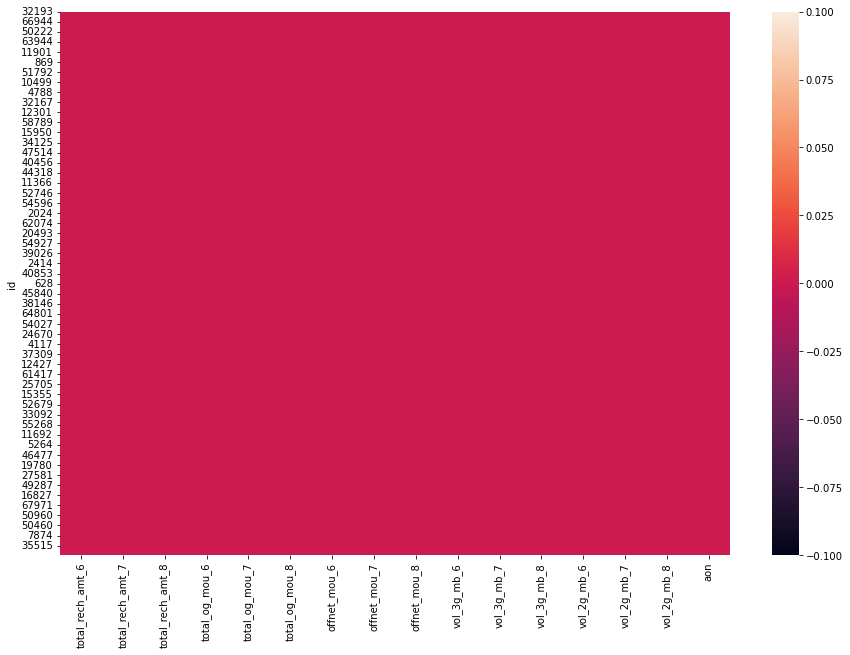

In [28]:
#Visualizing Missing data using Seaborn again
plt.figure(figsize=(15,10))
sns.heatmap(X_train_filtered.isna())

`Now the data has no missing values hence the imputation worked`

In [29]:
X_train_filtered.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,327.715495,322.130467,323.558099,305.743167,310.131863,304.103330,190.430898,189.017657,185.745860,119.949591,127.510168,133.310042,51.704553,51.165663,50.037008,1219.996607
std,411.094629,419.937814,433.490211,465.700615,477.117057,475.716489,312.484322,314.967495,315.433975,540.743101,550.895695,551.648222,210.685203,210.513252,207.660651,952.400201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000
25%,109.000000,100.000000,91.000000,44.380000,42.960000,38.680000,28.630000,26.660000,23.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000
50%,229.000000,220.000000,226.000000,144.580000,141.130000,138.310000,89.830000,85.560000,82.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,867.000000
75%,438.000000,429.000000,436.000000,374.470000,380.395000,371.420000,223.290000,218.600000,216.635000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1814.000000
max,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,8362.360000,7043.980000,14007.340000,45735.400000,28144.120000,30036.060000,7213.060000,7873.550000,7027.180000,4321.000000


# 4. EDA <a id='eda'></a>

### --------------------------------------------------- Univariate Analysis--------------------------------------------------------

#### Using Boxplot to do a one view split check on data

<AxesSubplot:>

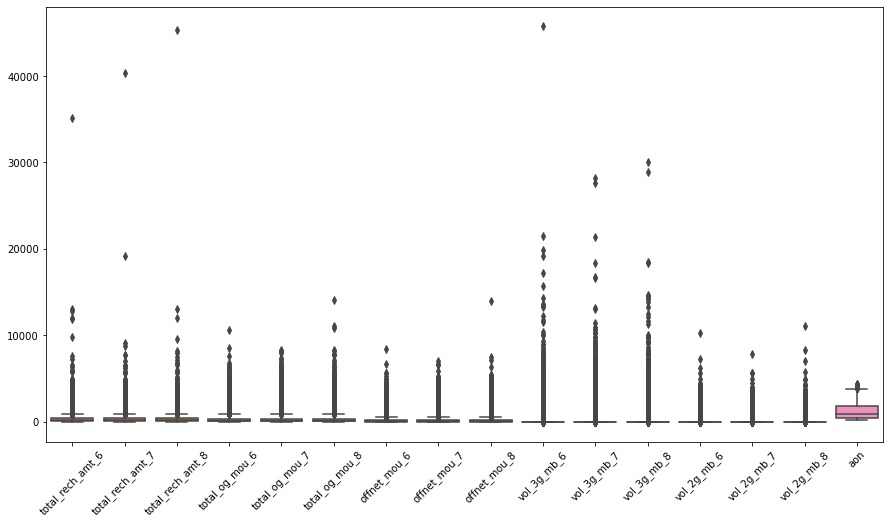

In [26]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

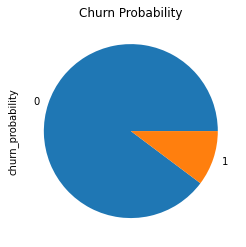

In [42]:
# lets find out churn/non churn percentage
((y_train.value_counts(normalize = True)*100)).plot(kind="pie")
plt.title('Churn Probability')
plt.show()

### 4.1 Handling outliers

The box plots of these features show there a lot of outliers. Applying <b>k-sigma</b> method for capping.

In [43]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<AxesSubplot:>

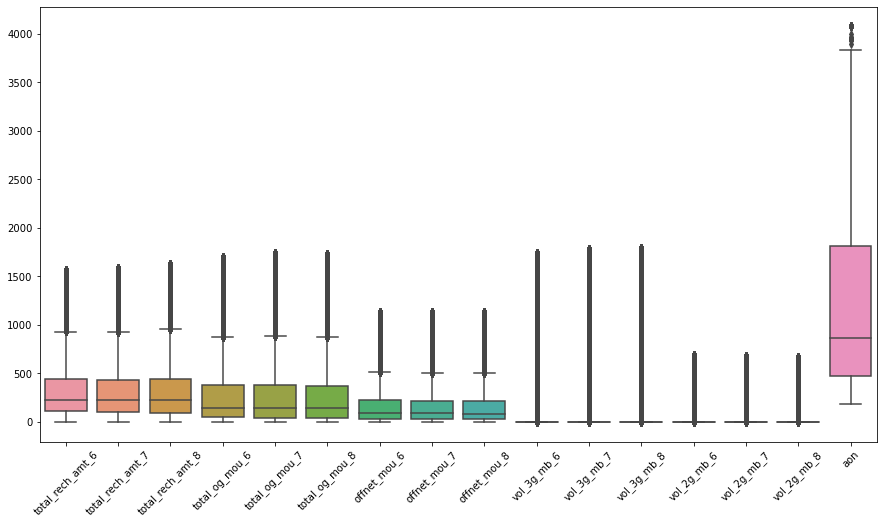

In [70]:
X_train_filtered1 = X_train_filtered.apply(cap_outliers, axis=0)
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered1)
plt.show()

### 4.2 Scaling Features

In [71]:
scale = StandardScaler()
X_train_filtered2 = scale.fit_transform(X_train_filtered1)

<AxesSubplot:>

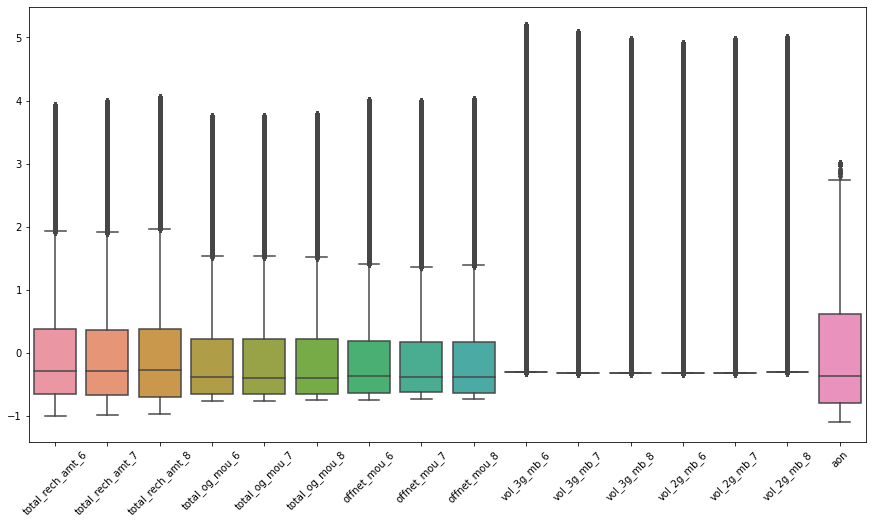

In [72]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_filtered2, columns=new_vars))
plt.show()

### ---------------------------------------------------- Bivariate Analysis--------------------------------------------------------

In [50]:
#Creating a replicated data for visualization
data_cpy = data.copy()

In [51]:
# creating a new variable 'tenure'
data_cpy['tenure'] = (data_cpy['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
data_cpy.drop('aon',axis=1, inplace=True)

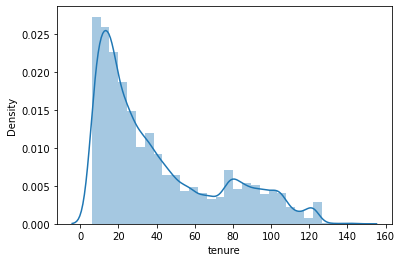

In [52]:
# Checking the distribution of he tenure variable

sns.distplot(data_cpy['tenure'],bins=30)
plt.show()

`Most of the Tenure is around 5-40 months`

#### Clustering Tenure to gather more visuals

In [56]:
tn_range = [1, 6, 12, 24, 60, 61]
tn_label = [ '1-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_cpy['tenure_range'] = pd.cut(data_cpy['tenure'], tn_range, labels=tn_label)
data_cpy['tenure_range'].head()

id
0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['1-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

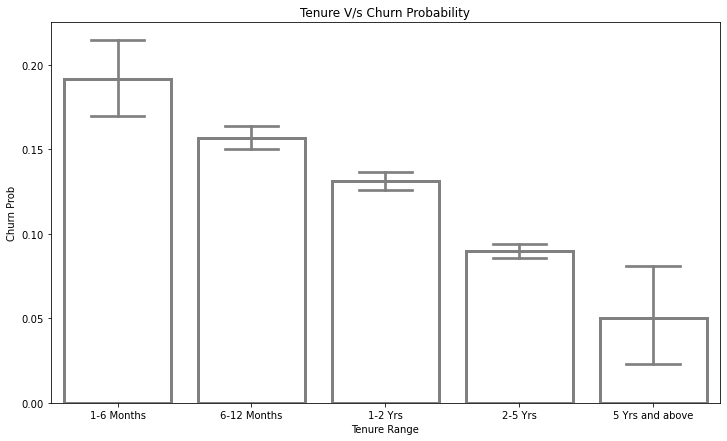

In [69]:
#Visualizing Tenure
plt.figure(figsize=[12,7])
sns.barplot(
    data=data_cpy, x="tenure_range", y="churn_probability",
    capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)
plt.xlabel('Tenure Range')
plt.ylabel('Churn Prob')
plt.title('Tenure V/s Churn Probability')
plt.show()

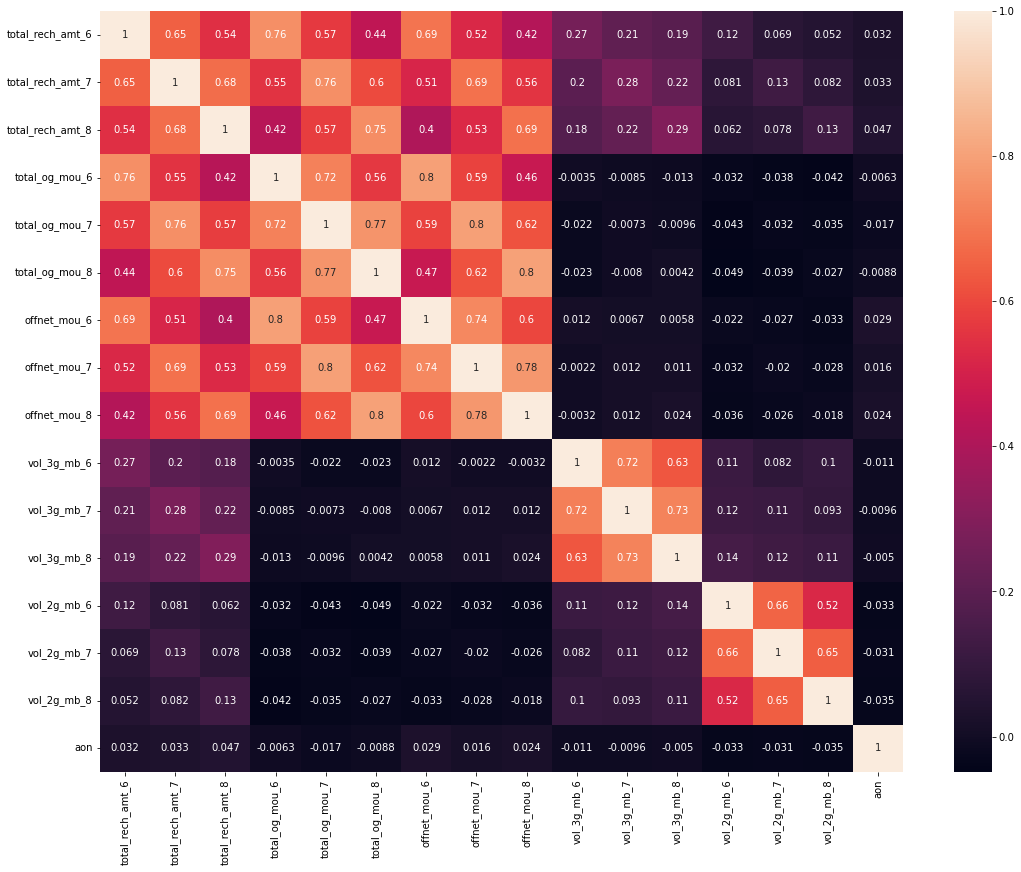

In [76]:
#Understanding Correlations within data
plt.figure(figsize=(18,14))
sns.heatmap(pd.DataFrame(X_train_filtered2, columns=new_vars).corr(),annot = True)
plt.show()

# 5. Deducing Feature Importance  <a id= feature_imp ></a>

Performing a random forest classification with 100 estimators for starters (100 being a random number)

In [77]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_filtered2, y_train)

RandomForestClassifier(n_jobs=-1)

In [78]:
feature_importances = pd.DataFrame({'col':new_vars, 'importance':rf.feature_importances_})

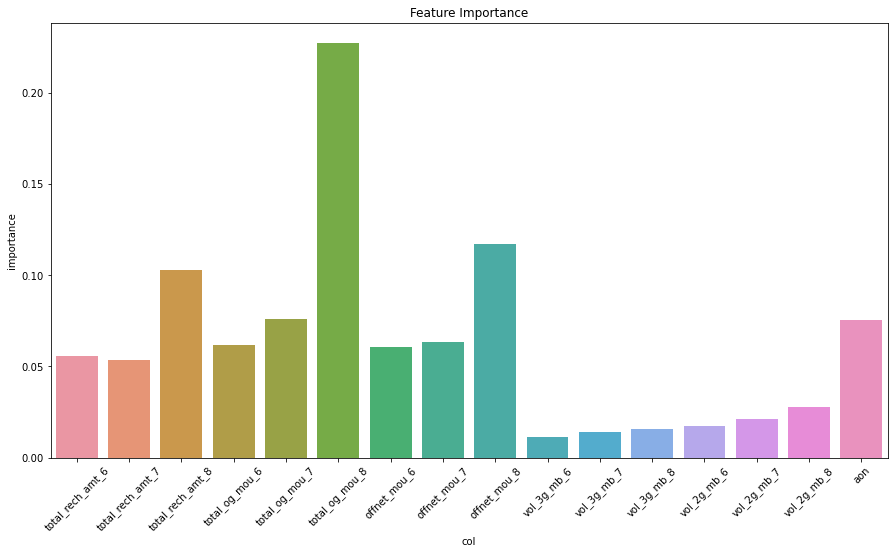

In [80]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(feature_importances['col'], feature_importances['importance'])
plt.title('Feature Importance')
plt.show()

`Projecting them into a lower dimensional space using PCA.`

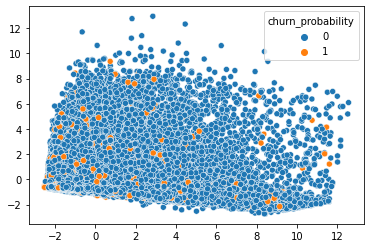

In [81]:
pca = PCA()
pca_components = pca.fit_transform(X_train_filtered2)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train, palette= 'viridis')
plt.show()

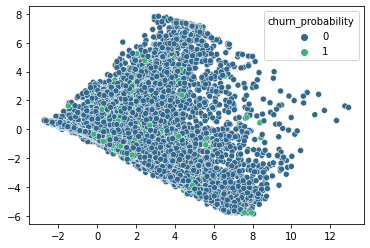

In [99]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train, palette= 'viridis')
plt.show()

Understand which of the components have high feature importance.

<BarContainer object of 16 artists>

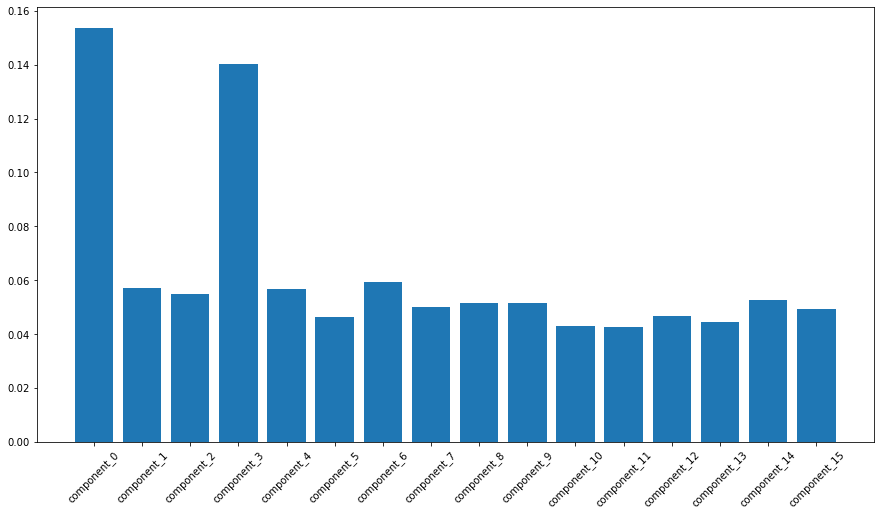

In [83]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(16)], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(feature_importances['col'], feature_importances['importance'])
plt.show()

# 6. Model building <a id='model_build'></a>

Logistic model is a good starting point

In [84]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:2], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [85]:
lr.score(pca_components[:,:2], y_train)

0.8976231718423543

`Build a pipeline to fit and score the model faster.`

In [86]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=10)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [87]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [88]:
pipe.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [89]:
train_score = pipe.score(X_train[new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.8998910694833836


In [90]:
test_score = pipe.score(X_test[new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9013571428571429


### Model Evaluation

In [91]:
confusion_matrix(y_train, pipe.predict(X_train[new_vars]))

array([[49999,   267],
       [ 5339,   394]])

In [92]:
confusion_matrix(y_test, pipe.predict(X_test[new_vars]))

array([[12535,    66],
       [ 1315,    84]])

Since there are class imbalance, high amount of type 2 error exists

In [93]:
precision_score(y_test, pipe.predict(X_test[new_vars]))

0.56

In [94]:
recall_score(y_test, pipe.predict(X_test[new_vars]))

0.06004288777698356

### --------------------------------------------------- End of Analysis--------------------------------------------------------

### Creating submission file (For Kaggle)

In [95]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

#### Moving to test.csv file

In [96]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [97]:
submission_data = unseen.set_index('id')[new_vars]
submission_data.shape

(30000, 16)

Creating a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [98]:
unseen['churn_probability'] = pipe.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [54]:
output.to_csv('submission_.csv',index=False)